# Basic Data Analysis in Python

This workshop introduces the basics of using Python for data analysis, specifically packages like NumPy, Pandas, and Scikit-Learn.

Throughout, we'll be working with a dataset of home prices in Iowa. This is a fairly common dataset for practicing and testing advanced regression techniques. If you're a real estate mogul or something, and you can model housing prices well, then you could recognize undervalued properties and sell them for their true market value, making a bundle in the process. 

In [1]:
import numpy as np
import sklearn as sk

We'll start by talking about programming stuff, like vectorization in NumPy. Then we'll load our dataset as a Pandas dataframe and play around with it, with some minor visualization. We'll spend the final 40% of the talk doing some modeling with SciKit-Learn.

## NumPy

Python, being an interpreted language, is unfortunately not the fastest thing out there. If you're an analyst, you aren't exactly paid to write software, but you still care about performance - some matrix operations have the potential to take a pretty long time, even if the data is small enough to fit in RAM.

NumPy is a Python package for working with very large, often multidimensional arrays, and provides a lot of useful functions for mathematical operations on either scalars or arrays. 

### Arrays

NumPy's `ndarray`s (n-dimensional arrays) compose the core functionality behind NumPy. All the sexy packages - Tensorflow, Scikit-Learn, OpenCV - they're all built on top of NumPy. We like NumPy because it performs as fast as a compiled language like Fortran, but as easy to use as Python.

Today, however, all we care about is the NumPy array. You can initialize one by calling `np.array()` on a list.

In [2]:
print (np.array(range(10)))
print (np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


### Vectorization

A really common task in data science is applying a transformation to data. If you're storing your data as a list, and you want to add `1` to every element of your list, then you'd want to iterate over your data like so.

I'm using the `time` library to demonstrate performance.

In [3]:
import time

n = 10**6

start = time.time()
foo = list(range(n))
for i in range(len(foo)):
    foo[i] = foo[i] + 1
end = time.time()
print ("For loop:", end - start)

For loop: 0.35578131675720215


In [4]:
# slightly better: list comprehensions
start = time.time()
foo = [elem + 1 for elem in foo]
end = time.time()
print(end - start)

0.1331636905670166


If you've stored your data as a numpy array, you can do this in one hundredth of the time.

In [5]:
foo = np.array(range(n))
start = time.time()
foo = foo + 1 #this gets applied element-wise to the array foo
end = time.time()
print(end - start) 

0.0


Note the syntax: `foo = foo + 1`. The `+ 1` gets *broadcast* to every element of the array `foo`. 

So not only is this much faster, but your code is more elegant - instead of having a bunch of `for` loops every time you need to do something with or to your data, you can have code that looks a lot more like a page of notes from 21-241.

Below is another example of what I'm talking about:

In [6]:
n = 10**6

a = list(range(n))
b = list(range(n))

start = time.time()
c = list(range(n))
for i in range(len(c)):
    c[i] = a[i] + b[i]
end = time.time()
print ("regular:", end - start)

start = time.time()
c = [a[i] + b[i] for i in range(len(a))]
end = time.time()
print ("list comprehension:", end - start)

a = np.array(a)
b = np.array(b)
start = time.time()
c = a + b
end = time.time()
print ("NumPy:", end - start)

regular: 0.408444881439209
list comprehension: 0.20514559745788574
NumPy: 0.018010616302490234


This programming paradigm, where we take operations between scalars and seamlessly generalize them to vectors, is called *vectorization*. 

Vectorized Python is almost always much faster, because the interpreter is taking the array operations and using compiled code to execute them. These array operations frequently have nasty big-O bounds associated with them, so of course they're the source of our efficiency pains.

We won't need anything more than the 1-dimensional array for today, but we'll find the paradigm useful nonetheless.

### Boolean Indexing

Subsetting data based on conditions is very straightforward in NumPy.

In [7]:
inds = foo < 10
print (foo[inds])
print (foo[~inds])

[1 2 3 4 5 6 7 8 9]
[     10      11      12 ...,  999998  999999 1000000]


In [8]:
# Quiz: Get a list of all the odd elements of foo
# Answer: foo[foo % 2 == 1]

In [9]:
def train_test_split(X, Y, p=0.75):
    train_inds = np.random.randn(len(X)) < p
    X_train, X_test = X[train_inds], X[~train_inds]
    Y_train, Y_test = Y[train_inds], Y[~train_inds]
    return (X_train, Y_train, X_test, Y_test)

### Miscellaneous stuff

Random number generation is nice.

In [10]:
print (np.random.uniform(0, 1, size=5)) #10 draws from Uniform(0, 1)
print (np.random.normal(0, 100, size=5)) #10 draws from Normal(0, 100)
print (np.random.choice(["A", "B", "C", "D"], size=5)) #10 draws with replacement

[ 0.20930587  0.99626923  0.40913373  0.43623427  0.4733187 ]
[ -16.59256493   28.26852914   26.29909304 -111.18264654  -35.96742186]
['A' 'A' 'D' 'D' 'C']


## Pandas

Pandas gives us the `DataFrame` data structure, which you can think of as simply a 2-D array. The columns must have the same length, but you can have different column types.

The dataframe can be indexed by row or by column. You can index a dataframe by its row just like you would a python list, and you index a column by its string column name.

Example below.

In [11]:
import pandas as pd

df = pd.DataFrame({
        "A":list(range(10)),
        "B":np.random.randn(10),
        "C":7,
        "D":["this is a string" for i in range(10)]
    })

df

,A,B,C,D
0,0,-1.959597,7,this is a string
1,1,2.007729,7,this is a string
2,2,1.184746,7,this is a string
3,3,0.175203,7,this is a string
4,4,-0.361289,7,this is a string
5,5,0.749168,7,this is a string
6,6,0.262394,7,this is a string
7,7,-0.469668,7,this is a string
8,8,-1.276390,7,this is a string
9,9,-0.507516,7,this is a string


In [12]:
df.iloc[3:7] #iloc for "integer location". Use this for selecting rows of a dataframe.

,A,B,C,D
3,3,0.175203,7,this is a string
4,4,-0.361289,7,this is a string
5,5,0.749168,7,this is a string
6,6,0.262394,7,this is a string


In [13]:
df["B"][[3, 4, 8]]

3    0.175203
4   -0.361289
8   -1.276390
Name: B, dtype: float64

In [14]:
df["B"][3]

0.17520250587714439

In [15]:
# Kaggle Competition: Predicting housing prices from data about the house
data = pd.read_csv("train.csv") 
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [16]:
# Features we'll look at:
# OverallQual: Rates the overall material and finish of the house
# OverallCond: Rates the overall condition of the house
# GarageArea: Size of garage in square feet
# YrSold: Year Sold (YYYY)
# LotFrontage: Linear feet of street connected to property
# LotArea: Lot size in square feet
# YearBuilt: Original construction date

data_subset = data[["SalePrice", "OverallQual", "OverallCond", "GarageArea", 
              "YrSold", "LotArea", "LotFrontage", "YearBuilt"]]
data_subset.head()

,SalePrice,OverallQual,OverallCond,GarageArea,YrSold,LotArea,LotFrontage,YearBuilt
0,208500,7,5,548,2008,8450,65.0,2003
1,181500,6,8,460,2007,9600,80.0,1976
2,223500,7,5,608,2008,11250,68.0,2001
3,140000,7,5,642,2006,9550,60.0,1915
4,250000,8,5,836,2008,14260,84.0,2000


Okay, so let's begin some exploratory analysis. We'll start by using `matplotlib` to create some histograms to examine the marginal distributions of each variable.

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline 
#^this is a magic function in IPython. Don't worry about it, it's not really that interesting.

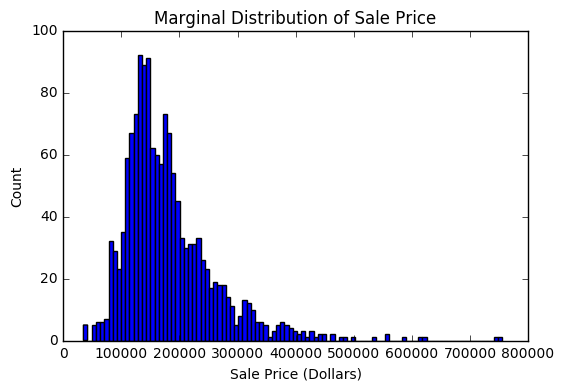

In [18]:
plt.hist(data_subset["SalePrice"], bins=100)
plt.title("Marginal Distribution of Sale Price")
plt.xlabel("Sale Price (Dollars)")
plt.ylabel("Count")
plt.show()

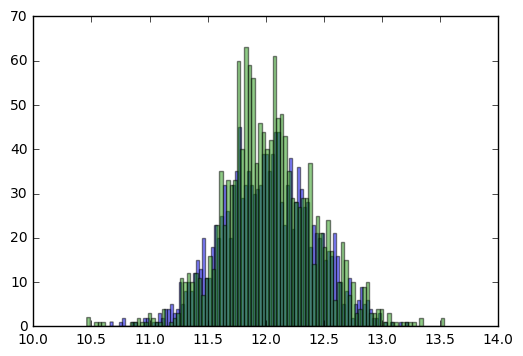

In [19]:
x = np.log(data_subset["SalePrice"])
mu = np.mean(x)
sigma = np.std(x)
n = len(x)
plt.hist(np.random.normal(mu, sigma, size=n), 
         alpha=0.5, 
         color = "blue",
         bins=100)
plt.hist(x, 
         alpha=0.5, 
         bins=100,
        color="#229911")
plt.show()

To create a new column, you can use the following syntax.

The `loc=0` keyword denotes the order that the columns appear. The other columns just get shoved aside.

In [20]:
data_subset.insert(loc=0, column="LogSalePrice", value=np.log(data_subset["SalePrice"]))
data_subset.head()

,LogSalePrice,SalePrice,OverallQual,OverallCond,GarageArea,YrSold,LotArea,LotFrontage,YearBuilt
0,12.247694,208500,7,5,548,2008,8450,65.0,2003
1,12.109011,181500,6,8,460,2007,9600,80.0,1976
2,12.317167,223500,7,5,608,2008,11250,68.0,2001
3,11.849398,140000,7,5,642,2006,9550,60.0,1915
4,12.429216,250000,8,5,836,2008,14260,84.0,2000


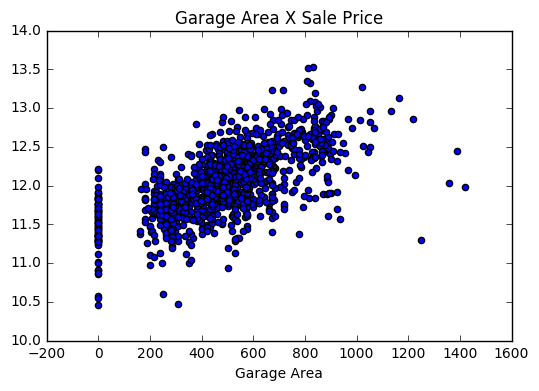

In [21]:
plt.scatter(data_subset["GarageArea"], data_subset["LogSalePrice"])
plt.title("Garage Area X Sale Price")
plt.xlabel("Garage Area")
plt.show()

In [22]:
# Quiz: 
# Add a column HasGarage which is True IFF the house has a garage
# data_subset.insert(loc=9, column="HasGarage", 
#                    value=data_subset["GarageArea"] > 0)

Visualizations aren't really the focus of this talk, so I won't dwell on matplotlib.

Before we can begin modeling, we ought to take a cursory glance at our data - some of our features have lots of missing values. Particularly `LotFrontage`.

NumPy has a sentinel value "NaN" (not a number) to indicate missing values. If you want to test for missing values, use `np.isnan`, because equality testing for `np.nan` will fail.

In [23]:
for col in data_subset.columns:
    numnan = sum(np.isnan(data_subset[col]))
    if numnan > 0:
        print (col, numnan)

LotFrontage 259


So what do we do with features where we've got missing values? 

Ideas:
* Ditch the feature entirely
* Drop rows where values are missing
* Replace the missing values

For pedagogical purposes, you'll see how each of these can be done in pandas.

In [24]:
# What to do with missing values?

# 1. Ditch the feature entirely
data_feature_ditched = data_subset[["SalePrice", "OverallQual", "OverallCond", "GarageArea", 
              "YrSold", "LotFrontage", "YearBuilt"]]
print (data_feature_ditched.shape)
data_feature_ditched.head()

(1460, 7)


,SalePrice,OverallQual,OverallCond,GarageArea,YrSold,LotFrontage,YearBuilt
0,208500,7,5,548,2008,65.0,2003
1,181500,6,8,460,2007,80.0,1976
2,223500,7,5,608,2008,68.0,2001
3,140000,7,5,642,2006,60.0,1915
4,250000,8,5,836,2008,84.0,2000


That works, but it's pretty gross. 

Luckily, the pandas dataframe has this nice "drop" method, which returns a new dataframe.

The `axis=1` argument specifies that we're dropping the *column* named "LotFrontage", not that we're dropping a row named "LotFrontage."

In [25]:
# 1 (Cont'd) 

data_ditched = data_subset.drop("LotFrontage", axis=1)
print (data_ditched.shape)
data_ditched.head()

(1460, 8)


,LogSalePrice,SalePrice,OverallQual,OverallCond,GarageArea,YrSold,LotArea,YearBuilt
0,12.247694,208500,7,5,548,2008,8450,2003
1,12.109011,181500,6,8,460,2007,9600,1976
2,12.317167,223500,7,5,608,2008,11250,2001
3,11.849398,140000,7,5,642,2006,9550,1915
4,12.429216,250000,8,5,836,2008,14260,2000


If you want to limit your analysis to data where there are no missing values, you could do this like so.

Recall how `np.isnan` gets vectorized.

# SHOULD I MAKE THIS A QUIZ?

In [26]:
# 2. Ditch rows where values are missing

# np.isnan(data): returns a new dataframe of bools
# np.sum(data, axis=1): returns the sum of ROWS of the input dataframe (axis = 0 would be columns)
data_clean = data_subset[~np.isnan(data_subset["LotFrontage"])]
print (data_clean.shape)
data_clean.head()

(1201, 9)


,LogSalePrice,SalePrice,OverallQual,OverallCond,GarageArea,YrSold,LotArea,LotFrontage,YearBuilt
0,12.247694,208500,7,5,548,2008,8450,65.0,2003
1,12.109011,181500,6,8,460,2007,9600,80.0,1976
2,12.317167,223500,7,5,608,2008,11250,68.0,2001
3,11.849398,140000,7,5,642,2006,9550,60.0,1915
4,12.429216,250000,8,5,836,2008,14260,84.0,2000


In [27]:
print (data_clean.index) # this COULD get confusing down the line, but it's not really a big deal.
data_clean = data_clean.reset_index()
print (data_clean.index) 

Int64Index([   0,    1,    2,    3,    4,    5,    6,    8,    9,   10,
            ...
            1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459],
           dtype='int64', length=1201)
RangeIndex(start=0, stop=1201, step=1)


In [28]:
# 2 (cont'd)
# More general and pandorable. Maybe I want to check NaNs for lots of rows at once!

# data.dropna(how='any')    #to drop if any value in the row has a nan
# data.dropna(how='all')    #to drop if all values in the row are nan
data_clean = data_subset.dropna(how="any") #dropna returns a new dataframe
print (data_clean.shape)
data_clean = data_clean.reset_index()
print (data_clean.index[-1])
data_clean.head()

(1201, 9)
1200


,index,LogSalePrice,SalePrice,OverallQual,OverallCond,GarageArea,YrSold,LotArea,LotFrontage,YearBuilt
0,0,12.247694,208500,7,5,548,2008,8450,65.0,2003
1,1,12.109011,181500,6,8,460,2007,9600,80.0,1976
2,2,12.317167,223500,7,5,608,2008,11250,68.0,2001
3,3,11.849398,140000,7,5,642,2006,9550,60.0,1915
4,4,12.429216,250000,8,5,836,2008,14260,84.0,2000


In [29]:
# 3. Impute missing values
# Doing this manually is pretty awful tbh. 
data_imputed = data_subset.copy()
data_imputed = data_imputed.fillna(data_imputed.mean())
data_imputed.head()

,LogSalePrice,SalePrice,OverallQual,OverallCond,GarageArea,YrSold,LotArea,LotFrontage,YearBuilt
0,12.247694,208500,7,5,548,2008,8450,65.0,2003
1,12.109011,181500,6,8,460,2007,9600,80.0,1976
2,12.317167,223500,7,5,608,2008,11250,68.0,2001
3,11.849398,140000,7,5,642,2006,9550,60.0,1915
4,12.429216,250000,8,5,836,2008,14260,84.0,2000


In [30]:
pd.isnull(data_subset["LotFrontage"]).sum()

259

In [31]:
pd.isnull(data_imputed["LotFrontage"]).sum()

0

### Pandas Aliasing

We're pretty fast and loose with pointers here. Here's where we can run into trouble

In [32]:
df = pd.DataFrame(np.random.randn(10,3))
df

,0,1,2
0,0.105386,0.278027,-0.436343
1,-2.229758,1.424456,-0.490637
2,-0.396842,-1.259655,-0.222679
3,-1.274142,-0.751760,0.507648
4,0.388535,-0.259318,0.736568
5,1.208866,0.624173,1.802434
6,1.046050,0.138581,1.723682
7,1.165679,0.504651,1.223406
8,-0.778077,1.264969,-1.239138
9,0.475801,0.113141,-1.024957


In [33]:
df2 = df
df2[0][0] = df[0][0] + 1
print (df2[0][0] == df[0][0]) #Modifying df2 modifies df

True


In [34]:
df2 = df.copy()
df2[0][0] = df[0][0] + 1
print (df2[0][0] == df[0][0]) #Fixed

False


In [35]:
df3 = df[1]
df3[0] = df[1][0] + 1
df3[0] == df[1][0] #Oh noes

True

In [36]:
df3 = df[1].copy()
df3[0] = df[1][0] + 1
df3[0] == df[1][0] #fixed

False

## Model Evaluation

When we've got lots of data at our disposal, and we want to try out a variety of models, we can do that by partitioning our dataset into two: a *training* and a *test* set. 

Overfitting is a dangerous phenomenon, especially in more complex models like polynomial regression, but we can use a separate test set to get an unbiased measure of generalization accuracy. 

In [37]:
from sklearn.model_selection import train_test_split

features = ["OverallQual", "OverallCond", "GarageArea", 
              "YrSold", "LotArea", "LotFrontage", "YearBuilt"]
XTrain, XTest, yTrain, yTest = train_test_split(
    data_imputed[features], 
    data_imputed["LogSalePrice"], 
    test_size=100)
# uppercase X denotes that X is a matrix, and lowercase y denotes a vector

In practice, we usually partition into *three* sets, including a third "validation" set. We train a bunch of models on training data, then check each's accuracy on our validation set, but if we iterate too much, eventually we'll start to overfit to the test data. 

So, to get a metric of generalization accuracy that's *independent of data we've seen before*, we only use the test set once to evaluate the accuracy of our final model.

Overfitting isn't as much of an issue with simple linear regression, and I can never remember which is which, but if you want to play around with this on your own, I highly recommend you do the following.

In [38]:
#XTest, XVal, yTest, yVal = train_test_split(XTest, yTest, test_size=50)

## Modeling in SciKit-Learn

Model-fitting in scikit-learn has a very straightforward paradigm to it. 

In [39]:
from sklearn import linear_model 

# Initialize linear regression object
model = linear_model.LinearRegression(fit_intercept=True)

# fit your model to training data
model.fit(XTrain, yTrain)

# Make predictions using the testing set
yPreds = model.predict(XTest)

In [40]:
from sklearn.metrics import r2_score

print ("Test R-Squared:", r2_score(y_true = yTest, y_pred = yPreds))
print ("Training R-Squared:", r2_score(y_true = yTrain, y_pred = model.predict(XTrain)))

Test R-Squared: 0.751295373521
Training R-Squared: 0.771789739823


You can use the `coef_` and `intercept_` attributes of your model object to examine the fitted coefficients of your model. 

Hypothesis testing isn't supported by Scikit Learn, but scipy does.

In [41]:
for i in range(len(features)):
    print (features[i], model.coef_[i])
    
print ("Intercept", model.intercept_)

OverallQual 0.163013658938
OverallCond 0.0447437830666
GarageArea 0.000381184306222
YrSold -0.00584970822468
LotArea 5.08959226712e-06
LotFrontage 0.00156809881549
YearBuilt 0.00265225206393
Intercept 16.953524954


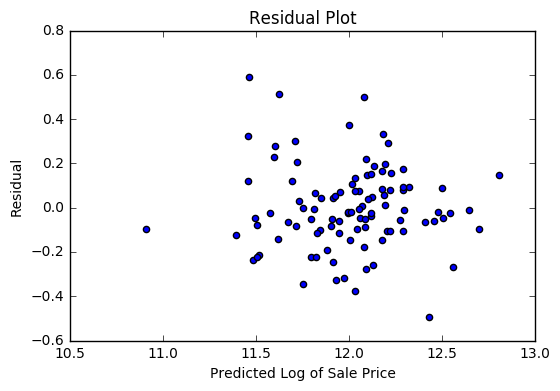

In [42]:
plt.scatter(yPreds, yPreds - yTest)
plt.xlabel("Predicted Log of Sale Price")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.show()